# 第 6 章 多元回归分析：深入专题 
## C6.1【多元回归；非线性函数形式】 

仅使用KIELMC.RAW 中 1981 年的数据，回答如下问题。数据是1981 年再马萨诸塞州北安多弗 市售出住房的数据；1981 年是开始建造地方垃圾焚化炉的一年。 

（1）为了研究垃圾焚化炉的位置对住房价格的影响，考虑简单回归模型： 
$\log{price}=\beta_0+\beta_1 \log(dist)+\mu$其中，price为住房的美元价格，dist为从住房到焚化炉的距离，以英尺为单位。谨慎地解释这个方程，如果焚化炉的出现会使住房价格下降，你预期$\beta_1$的符号是什么？估计这个方程，并解释你的结论。

（2）在第（1）部分的简单回归模型中增加变量 log(intst)，log(area)，log(land)，rooms，baths 和age，其中intst 表示从家到州际高速公路的距离，area 表示住房的平方英尺数，land 表示 占地的平方英尺数，rooms 表示总的房间数，baths 表示总的卫生间数，age 表示主房的年数。现在，你对焚化炉的影响有什么结论？解释为什么第（1）和第（2）部分给出相互矛盾的结论。 

（3）向第（2）部分的模型中添加[log(intst)]，结果会怎样？你对函数形式的重要性有什么结 论？ 

（4）当你向第（3）部分的模型中添加[log(dist)] 时，它是否显著?

In [1]:
library(haven)
KIELMC <- read_dta("C:/Users/bradl/SRM/data/KIELMC.DTA")
attach(KIELMC)
a<-subset(KIELMC, year==1981) 

（1）为了研究垃圾焚化炉的位置对住房价格的影响，考虑简单回归模型： 
$\log{price}=\beta_0+\beta_1 \log(dist)+\mu$其中，price为住房的美元价格，dist为从住房到焚化炉的距离，以英尺为单位。谨慎地解释这个方程，如果焚化炉的出现会使住房价格下降，你预期$\beta_1$的符号是什么？估计这个方程，并解释你的结论。

In [2]:
fit1<-lm(log(price)~log(dist), data=a) 
summary(fit1) 


Call:
lm(formula = log(price) ~ log(dist), data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87318 -0.22657 -0.01985  0.25687  0.95045 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.04716    0.64624  12.452  < 2e-16 ***
log(dist)    0.36488    0.06576   5.548 1.39e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3543 on 140 degrees of freedom
Multiple R-squared:  0.1803,	Adjusted R-squared:  0.1744 
F-statistic: 30.79 on 1 and 140 DF,  p-value: 1.395e-07


（2）在第（1）部分的简单回归模型中增加变量 log(intst)，log(area)，log(land)，rooms，baths 和age，其中intst 表示从家到州际高速公路的距离，area 表示住房的平方英尺数，land 表示 占地的平方英尺数，rooms 表示总的房间数，baths 表示总的卫生间数，age 表示主房的年 数。现在，你对焚化炉的影响有什么结论？解释为什么第（1）和第（2）部分给出相互矛盾的结论。 

In [3]:
fit2<-lm(log(price)~log(dist)+ log(intst)+log(area)+log(land)+rooms+baths+age, data=a)  #拟合上述 模型。 
summary(fit2) 


Call:
lm(formula = log(price) ~ log(dist) + log(intst) + log(area) + 
    log(land) + rooms + baths + age, data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74072 -0.10669  0.00932  0.11817  0.61387 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.592332   0.641711  11.831  < 2e-16 ***
log(dist)    0.055389   0.057621   0.961 0.338153    
log(intst)  -0.039032   0.051662  -0.756 0.451261    
log(area)    0.319294   0.076418   4.178 5.27e-05 ***
log(land)    0.076824   0.039505   1.945 0.053908 .  
rooms        0.042528   0.028251   1.505 0.134588    
baths        0.166923   0.041944   3.980 0.000113 ***
age         -0.003567   0.001059  -3.369 0.000985 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.201 on 134 degrees of freedom
Multiple R-squared:  0.7475,	Adjusted R-squared:  0.7344 
F-statistic: 56.68 on 7 and 134 DF,  p-value: < 2.2e-16


（3）向第（2）部分的模型中添加[log(intst)]，结果会怎样？你对函数形式的重要性有什么结论？ 

In [4]:
fit3<-lm(log(price)~log(dist)+ log(intst)+log(area)+log(land)+rooms+baths+age+I((log(intst))^2), data=a)  #拟合上述模型。 
summary(fit3)


Call:
lm(formula = log(price) ~ log(dist) + log(intst) + log(area) + 
    log(land) + rooms + baths + age + I((log(intst))^2), data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69399 -0.10160  0.00771  0.10456  0.54251 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.318025   2.645838  -1.254  0.21202    
log(dist)          0.185256   0.062351   2.971  0.00352 ** 
log(intst)         2.072959   0.500990   4.138 6.18e-05 ***
log(area)          0.359352   0.072620   4.948 2.22e-06 ***
log(land)          0.091386   0.037380   2.445  0.01580 *  
rooms              0.038106   0.026639   1.430  0.15493    
baths              0.149533   0.039733   3.763  0.00025 ***
age               -0.002927   0.001009  -2.900  0.00436 ** 
I((log(intst))^2) -0.119329   0.028172  -4.236 4.23e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1894 on 133 degrees of freedom
Multiple R-square

（4）当你向第（3）部分的模型中添加[log(dist)] 时，它是否显著？

In [5]:
fit4<-lm(log(price)~log(dist)+ log(intst)+log(area)+log(land)+rooms+baths+age+I((log(intst))^2)+I((log(dist))^2), data=a)  #拟合上述模型。
summary(fit4)
detach(KIELMC)


Call:
lm(formula = log(price) ~ log(dist) + log(intst) + log(area) + 
    log(land) + rooms + baths + age + I((log(intst))^2) + I((log(dist))^2), 
    data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69981 -0.10406  0.00968  0.10430  0.53690 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5.916131   8.295797  -0.713 0.477013    
log(dist)          0.869559   2.071035   0.420 0.675265    
log(intst)         1.934443   0.654421   2.956 0.003693 ** 
log(area)          0.355336   0.073871   4.810 4.05e-06 ***
log(land)          0.087871   0.038985   2.254 0.025846 *  
rooms              0.038055   0.026729   1.424 0.156879    
baths              0.150690   0.040020   3.765 0.000249 ***
age               -0.002869   0.001027  -2.794 0.005985 ** 
I((log(intst))^2) -0.110755   0.038363  -2.887 0.004546 ** 
I((log(dist))^2)  -0.036418   0.110167  -0.331 0.741496    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

## C6.2【依条件统计观测数；提取单个回归系数】 

本题利用WAGE1.RAW 中的数据。 

（1）使用OLS 估计方程 $\log(wage)=\beta_0+\beta_1 educ+\beta_2 exper+\beta_3 exper^2+\mu$ 并用通常的格式报告你的结论。

（2）$exper^2$ 在1%的显著性水平上是统计显著的吗？ 

（3）使用近似 $\Delta\hat{wage}\approx100(\hat{\beta_2}+2\hat{\beta_3}exper)\Delta exper$求第5年工作经历的近似回报。第20年工作经历的近似回报是多少？

（4）exper取什么值时，工作经历的增加实际上会降低预期的log(wage)。样本中有多少人具 有比该值更长的工作经历？ 

In [6]:
WAGE1 <- read_dta("C:/Users/bradl/SRM/data/WAGE1.DTA")
attach(WAGE1)

（1）使用OLS 估计方程 $\log(wage)=\beta_0+\beta_1 educ+\beta_2 exper+\beta_3 exper^2+\mu$ 并用通常的格式报告你的结论。

In [7]:
fit<-lm(log(wage)~educ+exper+I(exper^2)) #拟合上述模型。
summary(fit) 


Call:
lm(formula = log(wage) ~ educ + exper + I(exper^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96387 -0.29375 -0.04009  0.29497  1.30216 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1279975  0.1059323   1.208    0.227    
educ         0.0903658  0.0074680  12.100  < 2e-16 ***
exper        0.0410089  0.0051965   7.892 1.77e-14 ***
I(exper^2)  -0.0007136  0.0001158  -6.164 1.42e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4459 on 522 degrees of freedom
Multiple R-squared:  0.3003,	Adjusted R-squared:  0.2963 
F-statistic: 74.67 on 3 and 522 DF,  p-value: < 2.2e-16


（2）$exper^2$ 在1%的显著性水平上是统计显著的吗？

是

（3）使用近似 $\Delta\hat{wage}\approx100(\hat{\beta_2}+2\hat{\beta_3}exper)\Delta exper$求第5年工作经历的近似回报。第20年工作经历的近似回报是多少？


In [8]:
dtwage<-function(x){ 
    deltawage<-100*(coefficients(fit)["exper"]+2*coefficients(fit)["I(exper^2)"]*x) 
    return(deltawage) } 
dtwage(4)
dtwage(20)

exper 
3.530041

exper 
1.246655

（4）exper取什么值时，工作经历的增加实际上会降低预期的log(wage)。样本中有多少人具 有比该值更长的工作经历？ 

In [9]:
a<-coefficients(fit)["exper"]/((-2)*coefficients(fit)["I(exper^2)"]) #计算exper取到极值时是等于 a=28.73548。 
nrow(subset(WAGE1,exper>a))  #计算 WAGE1 中有多少样本的 exper 是大于a 的，结果为121。 
detach(WAGE1)

[1] 121

## C6.3【获取置信区间；构造变量】 

考虑一个教育回报取决于工作经历多少（反之亦然）的模型： 
$\log{wage}=\beta_0+\beta_1 educ+\beta_2 exper +\beta_3 educ*exper+\mu$


（1）证明：保持exper不变，多受一年教育的回报（以小数表示）是$\beta_1+\beta_3 exper$。 

$\frac{\partial(\log(wage))}{\partial{educ}}=\beta_1+\beta_3 exper$

（2）陈述如下虚拟假设：教育的回报并不取决于exper的水平。你认为合适的对立假设是什么？ 

$H_0:\beta_3 =0$。如果认为教育水平每增加一年，随着工作经历增加其回报会增加得更多。则对立假设是$H_1:\beta_3 >0$。

（3）利用 WAGE2.RAW中的数据，相对你给出的对立假设来检验（2）中的虚拟假设。 

（4）令$\theta_1$表示$exper=10$ 时（以小数表示）的教育回报：$\theta_1 = \beta_1+10\beta_2$。求出$\beta_1$的估计值及其95%的置信区间。

（3）利用 WAGE2.RAW中的数据，相对你给出的对立假设来检验（2）中的虚拟假设。 

In [10]:
WAGE2 <- read_dta("C:/Users/bradl/SRM/data/WAGE2.DTA")
attach(WAGE2)
fit1<-lm(log(wage)~educ+exper+I(educ*exper)) 
summary(fit1)


Call:
lm(formula = log(wage) ~ educ + exper + I(educ * exper))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88558 -0.24553  0.03558  0.26171  1.28836 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.949455   0.240826  24.704   <2e-16 ***
educ             0.044050   0.017391   2.533   0.0115 *  
exper           -0.021496   0.019978  -1.076   0.2822    
I(educ * exper)  0.003203   0.001529   2.095   0.0365 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3923 on 931 degrees of freedom
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.1321 
F-statistic: 48.41 on 3 and 931 DF,  p-value: < 2.2e-16


In [56]:
a<-summary(fit1)
b<-a$coefficients
interactionhat<-b[4,1] #交互项的估计值就是b[4,1]，保存在interactionhat 中。 
interactionse<-b[4,2] #interaction 的标准误就是 c[4,2]，保存在interactionse 中。 
t<-( interactionhat -0)/ interactionse #根据t 统计量的公式
p<-pt(-abs(t),931)
p

[1] 1.734794e-143

（4）令$\theta_1$表示$exper=10$ 时（以小数表示）的教育回报：$\theta_1 = \beta_1+10\beta_2$。求出$\theta_1$的估计值及其95%的置信区间。（提示：写成$\beta_1=\theta_1-10\beta_3$，代入方程重新整理。就能得到$\theta_1$的置信区间所需做的回归。）

In [12]:
fit2<-lm(log(wage)~educ+exper+I(educ*(exper-10)))
summary(fit2)
confint(fit2)
detach(WAGE2)


Call:
lm(formula = log(wage) ~ educ + exper + I(educ * (exper - 10)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88558 -0.24553  0.03558  0.26171  1.28836 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.949455   0.240826  24.704   <2e-16 ***
educ                    0.076080   0.006615  11.501   <2e-16 ***
exper                  -0.021496   0.019978  -1.076   0.2822    
I(educ * (exper - 10))  0.003203   0.001529   2.095   0.0365 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3923 on 931 degrees of freedom
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.1321 
F-statistic: 48.41 on 3 and 931 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),5.4768291195,6.422080300
educ,0.0630973587,0.089061718
exper,-0.0607036116,0.017711742
I(educ * (exper - 10)),0.0002019664,0.006203983


## C6.4【二次型极值】 

本题利用 GPA2.RAW 中的数据。 

（1）估计模型 $sat=\beta_0 +\beta_1 hsize+\beta_2 hsize^2 +\mu$
其中， hsize为毕业年级的规模（以百为单位），按通常的格式写出结论。二次项是统计显著的吗？ 

（2）利用第（1）部分的估计方程，高中学校的“最优”规模是什么？说明你的答案。 

（3）这个分析是所有高中高年级学生学术成绩的代表吗？请解释。 

（4）用log(sat)作为因变量，求出估计的高中最优规模。它与你在第（2）部分得到的结论很 不同吗？

In [13]:
library(wooldridge)
attach(gpa2)

（1）估计模型 $sat=\beta_0 +\beta_1 hsize+\beta_2 hsize^2 +\mu$
其中， hsize为毕业年级的规模（以百为单位），按通常的格式写出结论。二次项是统计显著的吗？ 

In [14]:
fit1<-lm(sat~hsize+I(hsize^2))
summary(fit1)


Call:
lm(formula = sat ~ hsize + I(hsize^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-562.38  -93.07   -3.71   90.62  507.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  997.981      6.203 160.875  < 2e-16 ***
hsize         19.814      3.991   4.965 7.14e-07 ***
I(hsize^2)    -2.131      0.549  -3.881 0.000106 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 138.9 on 4134 degrees of freedom
Multiple R-squared:  0.00765,	Adjusted R-squared:  0.007169 
F-statistic: 15.93 on 2 and 4134 DF,  p-value: 1.279e-07


（2）利用第（1）部分的估计方程，高中学校的“最优”规模是什么？说明你的答案。 

利用first order condition计算，约465人。

（3）这个分析是所有高中高年级学生学术成绩的代表吗？请解释。 

本例中的样本只包含了参加SAT 考试的学生，所以不能代表所有高中高年级学生学术成绩。 

（4）用log(sat)作为因变量，求出估计的高中最优规模。它与你在第（2）部分得到的结论很 不同吗？

In [15]:
fit2<-lm(log(sat)~hsize+I(hsize^2))
summary(fit2)


Call:
lm(formula = log(sat) ~ hsize + I(hsize^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77744 -0.08493  0.00557  0.09465  0.40946 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  6.8960291  0.0061515 1121.032  < 2e-16 ***
hsize        0.0196029  0.0039572    4.954 7.57e-07 ***
I(hsize^2)  -0.0020872  0.0005444   -3.834 0.000128 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1377 on 4134 degrees of freedom
Multiple R-squared:  0.007773,	Adjusted R-squared:  0.007293 
F-statistic: 16.19 on 2 and 4134 DF,  p-value: 9.885e-08


In [16]:
detach(gpa2)

## C6.5【因变量为 log(y)时对 y 的预测】 
本题利用HPRICE1.RAW 中的数据。 

（1）估计模型 
$$\log{price}=\beta_0+\beta_1 \log(lotsize)+\beta_2\log(sqrft)+\beta_3 bdrms+\mu$$
并以通常的 OLS 格式报告结论。 

（2）当lotsize=20000, sqrft=2500 和bdrms=4 时，求出log(price)的预测值。利用6.4节中的方法，在同样的解释变量值的情况下，求出price 的预测值。 

（3）就解释price 中的变异而言，决定你是偏好第（1）部分中的模型，还是偏好模型 
$$price=\beta_0+\beta_1 lotsize+\beta_2\log(sqrft)+\beta_3 bdrms+\mu$$

In [17]:
attach(hprice1)
fit1<-lm(log(price)~log(lotsize)+log(sqrft)+bdrms) 
summary(fit1)


Call:
lm(formula = log(price) ~ log(lotsize) + log(sqrft) + bdrms)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68422 -0.09178 -0.01584  0.11213  0.66899 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.29704    0.65128  -1.992   0.0497 *  
log(lotsize)  0.16797    0.03828   4.388 3.31e-05 ***
log(sqrft)    0.70023    0.09287   7.540 5.01e-11 ***
bdrms         0.03696    0.02753   1.342   0.1831    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1846 on 84 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6302 
F-statistic: 50.42 on 3 and 84 DF,  p-value: < 2.2e-16


In [18]:
new <- data.frame(lotsize=20000, sqrft=2500, bdrms=4) #生成新的数据框new，内容为 lotsize=20000, sqrft=2500 和bdrms=4。 
lpricehat<-predict(fit1,new) #用predict()函数进行预测，得到结果5.992899
lpricehat

1 
5.992899

In [19]:
a0<-mean(exp(residuals(fit1)))
pricehat<-a0*exp(lpricehat)
pricehat

1 
407.1224

In [57]:
fit2<-lm(price~lotsize+log(sqrft)+bdrms) 
summary(fit2)


Call:
lm(formula = price ~ lotsize + log(sqrft) + bdrms)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.226  -39.849   -8.217   32.842  214.979 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.707e+03  2.191e+02  -7.791 1.58e-11 ***
lotsize      2.242e-03  6.807e-04   3.293  0.00145 ** 
log(sqrft)   2.531e+02  3.104e+01   8.156 2.96e-12 ***
bdrms        1.789e+01  9.501e+00   1.883  0.06315 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 63.59 on 84 degrees of freedom
Multiple R-squared:  0.6299,	Adjusted R-squared:  0.6167 
F-statistic: 47.65 on 3 and 84 DF,  p-value: < 2.2e-16


## C6.6【交互项；偏效应】 
本题利用VOTE1.RAW 中的数据

（1）考虑一个含有竞选支出交互项的模型 

$$voteA=\beta_0+ \beta_1 prtystrA+\beta_2 expendA + \beta_3 expendB + \beta_4expendA*expendB +\mu$$ 
保持 prtystrA和expendA不变，expendB对voteA的偏效应是什么？expendA对voteA的偏效应是什么？$\beta_4$的预期符号明显吗？ 

（2）估计第（1）部分中的方程，并以通常的格式报告结果。交互项是统计显著的吗？ 

（3）求样本中expendA 的均值。固定expendA 为300（300000 美元）。候选人B 另外支出 100000 美元兑voteA 的估计影响是什么？这个影响很大吗？ 

（4）现在固定expendB 为100。∆expendA=100对voteA 的估计影响是什么？这讲得通吗？

（5）现在估计一个用候选人A 的支出占竞选总支出的百分比shareA 取代交互作用项的模型。 同时保持expendA 和expendB 不变而改变shareA，这讲得通吗？ 

（6）（要求有微积分知识）在第（5）部分的模型中，保持 prtystrA 和expendA 不变，求出 expendB 对voteA 的偏效应。在expendA=300 和 expendB=0 时进行计算，并评论你的结论。 

In [21]:
VOTE1 <- read_dta("C:/Users/bradl/SRM/data/VOTE1.DTA")
attach(VOTE1) 
fit1<-lm(voteA~prtystrA+expendA+expendB+expendA:expendB) #拟合上述模型。 
summary(fit1) 
library(stargazer)
stargazer(fit1, type="text", digits=8) 


Call:
lm(formula = voteA ~ prtystrA + expendA + expendB + expendA:expendB)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.9999  -8.7632  -0.1726   8.2310  29.7325 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.212e+01  4.591e+00   6.995 5.99e-11 ***
prtystrA         3.419e-01  8.799e-02   3.886 0.000146 ***
expendA          3.828e-02  4.960e-03   7.718 1.00e-12 ***
expendB         -3.172e-02  4.588e-03  -6.915 9.32e-11 ***
expendA:expendB -6.629e-06  7.186e-06  -0.923 0.357584    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.13 on 168 degrees of freedom
Multiple R-squared:  0.5708,	Adjusted R-squared:  0.5606 
F-statistic: 55.86 on 4 and 168 DF,  p-value: < 2.2e-16



Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




                        Dependent variable:     
                    ----------------------------
                               voteA            
------------------------------------------------
prtystrA                   0.34193980***        
                            (0.08799291)        
                                                
expendA                    0.03828094***        
                            (0.00495997)        
                                                
expendB                    -0.03172384***       
                            (0.00458754)        
                                                
expendA:expendB             -0.00000663         
                            (0.00000719)        
                                                
Constant                   32.11738000***       
                            (4.59115200)        
                                                
------------------------------------------------
Observations       

In [22]:
mean(expendA) 

[1] 310.611

In [23]:
(coefficients(fit1)["expendB"]+ coefficients(fit1)["expendA:expendB"]*300)*100 

expendB 
-3.371269

In [24]:
(coefficients(fit1)["expendA"]+ coefficients(fit1)["expendA:expendB"]*100)*100

expendA 
3.761799

In [25]:
fit2<-lm(voteA~prtystrA+expendA+expendB+shareA) #拟合上述模型。 
summary(fit2) 


Call:
lm(formula = voteA ~ prtystrA + expendA + expendB + shareA)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5859  -3.3764  -0.3036   3.2095  31.5656 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.195374   2.567856   7.086 3.63e-11 ***
prtystrA     0.157272   0.049685   3.165  0.00184 ** 
expendA     -0.006670   0.002833  -2.354  0.01971 *  
expendB      0.004267   0.002607   1.637  0.10351    
shareA       0.494394   0.025309  19.535  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.167 on 168 degrees of freedom
Multiple R-squared:  0.8681,	Adjusted R-squared:  0.865 
F-statistic: 276.5 on 4 and 168 DF,  p-value: < 2.2e-16


## C6.7【用 I()产生新变量】
## C6.8【预测值的置信区间；给定自变量的回归预测】 

本题利用HPRICE1.RAW 中的数据 

（1）估计模型$$ price=\beta_0+\beta_1 sqrft +\beta_3 bdrms+\mu$$
并按通常的格式报告你的结果，包裹回归标准误。当我们代入lotsize=10000，sqrft=2300 和 bdrms=4 时，求出预测价格，将这个价格四舍五入到最接近的美元。 

（2）做一个回归，使你能得到第（1）部分中预测值的一个 95%的置信区间。注意，由于四舍 五入的误差，你的预测将多少有些不同。 

（3）令price0为具有第（1）部分和第（2）部分所述特征的住房的未知未来售价。求出price0 的一个95%的置信区间，并对这个置信区间的宽度进行评价。

In [26]:
attach(hprice1) 

The following objects are masked from hprice1 (pos = 5):

    assess, bdrms, colonial, lassess, llotsize, lotsize, lprice,
    lsqrft, price, sqrft



In [27]:
fit1<-lm(price~lotsize+sqrft+bdrms) 
summary(fit1) #查看拟合结果。R-squared:  0.6724。Residual standard error: 59.83。 
round(fit1$coefficients,3) 
new <- data.frame(lotsize=10000, sqrft=2300, bdrms=4) #生成新的数据框new，内容为 lotsize=10000，sqrft=2300，bdrms=4。 
predict(fit1,new) 


Call:
lm(formula = price ~ lotsize + sqrft + bdrms)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.026  -38.530   -6.555   32.323  209.376 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.177e+01  2.948e+01  -0.739  0.46221    
lotsize      2.068e-03  6.421e-04   3.220  0.00182 ** 
sqrft        1.228e-01  1.324e-02   9.275 1.66e-14 ***
bdrms        1.385e+01  9.010e+00   1.537  0.12795    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 59.83 on 84 degrees of freedom
Multiple R-squared:  0.6724,	Adjusted R-squared:  0.6607 
F-statistic: 57.46 on 3 and 84 DF,  p-value: < 2.2e-16


(Intercept)     lotsize       sqrft       bdrms 
    -21.770       0.002       0.123      13.853

1 
336.7067

In [28]:
predict(fit1,new,interval = "confidence")

fit,lwr,upr
336.7067,322.0417,351.3716


In [29]:
predict(fit1,new,interval = "prediction") 

fit,lwr,upr
336.7067,216.8209,456.5924


## C6.9【提取单个回归系数；条件计数；二次型极值】 
数据集NBASAL.RAW 包含了美国职业篮球联赛（Natinal Basketball Association,NBA）269 位运动员的薪水信息和职业统计。 
（1）估计一个每场得分（points）与加入联盟年数（exper）、年龄（age）、大学期间打球年 数（coll）相联系的模型。包含一个 exper 的二次项，其他变量都应该以水平值形式加入模 型。按照通常的格式报告结果。 

（2）保持大学打球年数和年龄不变，从加入联盟的第几个年份开始，在NBA 打球的经历实际 上将降低每场得分？这讲得通吗？ 

（3）你为什么认为coll 具有负系数，而且统计显著？（提示：NBA 运动员在读完大学之前被 选拔出，甚至直接从高中选出。） 

（4）有必要在方程中增加age 的二次项吗？一旦控制了exper 和coll 之后，这对年龄效应意 味着什么？ 

（5）现在将log(wage)对points，exper，exper2，age 和coll 回归。以通常的格式报告结论。 

（6）在第（5）部分的回归中检验age 和coll 是否联合显著。一旦控制了生产力和资历，这对 考察年龄和受教育程度是否对工资具有单独影响这个问题有何含义？ 

In [30]:
attach(nbasal)

In [31]:
fit1<-lm(points~exper+I(exper^2)+age+coll) #拟合上述模型 
summary(fit1)


Call:
lm(formula = points ~ exper + I(exper^2) + age + coll)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4736  -3.9849  -0.8246   3.6536  20.9790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.21831    6.98673   5.041 8.62e-07 ***
exper        2.36363    0.40550   5.829 1.62e-08 ***
I(exper^2)  -0.07703    0.02348  -3.280 0.001177 ** 
age         -1.07396    0.29507  -3.640 0.000328 ***
coll        -1.28625    0.45059  -2.855 0.004651 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.509 on 264 degrees of freedom
Multiple R-squared:  0.1412,	Adjusted R-squared:  0.1282 
F-statistic: 10.85 on 4 and 264 DF,  p-value: 3.687e-08


In [32]:
fit2<-lm(points~exper+I(exper^2)+age+I(age^2)+coll) #在（1）的方程中增加 age 的二次项，并拟 合 
summary(fit2) 


Call:
lm(formula = points ~ exper + I(exper^2) + age + I(age^2) + coll)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2520  -4.0283  -0.8208   3.4792  20.8332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 73.59034   35.93341   2.048  0.04156 *  
exper        2.86383    0.61272   4.674 4.72e-06 ***
I(exper^2)  -0.12807    0.05244  -2.442  0.01525 *  
age         -3.98369    2.68908  -1.481  0.13969    
I(age^2)     0.05355    0.04919   1.089  0.27732    
coll        -1.31260    0.45108  -2.910  0.00392 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.508 on 263 degrees of freedom
Multiple R-squared:  0.1451,	Adjusted R-squared:  0.1288 
F-statistic: 8.925 on 5 and 263 DF,  p-value: 7.615e-08


In [33]:
fit3<-lm(log(wage)~points+exper+I(exper^2)+age+coll) #拟合上述模型 
summary(fit3) 


Call:
lm(formula = log(wage) ~ points + exper + I(exper^2) + age + 
    coll)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9564 -0.2907  0.1141  0.4102  1.7078 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.779038   0.845421   8.019 3.53e-14 ***
points       0.077730   0.007113  10.928  < 2e-16 ***
exper        0.217845   0.049788   4.375 1.75e-05 ***
I(exper^2)  -0.007082   0.002769  -2.558   0.0111 *  
age         -0.048137   0.034947  -1.377   0.1695    
coll        -0.040271   0.052872  -0.762   0.4469    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6367 on 263 degrees of freedom
Multiple R-squared:  0.4878,	Adjusted R-squared:  0.4781 
F-statistic:  50.1 on 5 and 263 DF,  p-value: < 2.2e-16


In [34]:
library(car) #载入car 包（首次使用用install.packages("car")安装。） 
myH0 <- c("age","coll") #用联合检验所涉及的变量组成向量，构成H0。 
linearHypothesis(fit3,myH0) 

Loading required package: carData


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
265,107.5915,NA,NA,NA,NA
263,106.6274,2,0.9641631,1.18907,0.3061358


## C6.10【因变量为 log(y)的可比较 R-squared；有缺失值时的条件计数】 

本题使用BWGHT2.RAW 中的数据。 

（1）用OLS 估计方程 $$\log(bwght)=\beta_0+\beta_1 npvis+\beta_2 npvis^2+\mu$$
并按照通常的格式报告结果。二次项显著吗？ 

（2）基于第（1）部分中的方程，证明：最大化 log(bwght)的产前检查次数约为22。样本中有多少妇女至少接受过22次产前检查？ 

（3）在22 次产前检查之后，预计婴儿出生体重实际上会下降，这有意义吗？请解释。 

（4）在方程中增加母亲年龄，并使用二次函数形式。保持 npvis 不变，目前在什么年龄，孩 子的出生体重最大？样本中有多大比例的妇女年龄大于这个“最优”生育年龄。 

（5）你认为母亲年龄和产前检查次数解释了log(bwght)中的大部分变异吗？ 

（6）利用npvis 和age 的二次方程，确定用bwght 的自然对数或水平值来预测bwght 孰优孰 劣。

In [35]:
attach(bwght2)

The following object is masked from package:wooldridge:

    bwght



In [36]:
fit1<-lm(log(bwght)~npvis+I(npvis^2)) #拟合上述模型。 
summary(fit1) 


Call:
lm(formula = log(bwght) ~ npvis + I(npvis^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15564 -0.08375  0.02241  0.11417  0.45529 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.9578826  0.0273125 291.364  < 2e-16 ***
npvis        0.0189167  0.0036806   5.140 3.06e-07 ***
I(npvis^2)  -0.0004288  0.0001200  -3.573 0.000362 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2031 on 1761 degrees of freedom
  (68 observations deleted due to missingness)
Multiple R-squared:  0.02125,	Adjusted R-squared:  0.02014 
F-statistic: 19.12 on 2 and 1761 DF,  p-value: 6.097e-09


In [37]:
sum(bwght2$npvis>=22,na.rm=TRUE)

[1] 21

In [38]:
fit2<-lm(log(bwght)~npvis+I(npvis^2)+mage+I(mage^2)) #拟合上述模型。 
summary(fit2)


Call:
lm(formula = log(bwght) ~ npvis + I(npvis^2) + mage + I(mage^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16701 -0.08369  0.02141  0.11635  0.44489 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.5837123  0.1370568  55.333  < 2e-16 ***
npvis        0.0180374  0.0037086   4.864 1.26e-06 ***
I(npvis^2)  -0.0004079  0.0001204  -3.387 0.000721 ***
mage         0.0253920  0.0092542   2.744 0.006134 ** 
I(mage^2)   -0.0004119  0.0001548  -2.661 0.007863 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2027 on 1759 degrees of freedom
  (68 observations deleted due to missingness)
Multiple R-squared:  0.02562,	Adjusted R-squared:  0.02341 
F-statistic: 11.56 on 4 and 1759 DF,  p-value: 2.865e-09


## C6.11【求变量值域；F 检验】 

利用APPLE.RAW 来验证6.3 节中的一些命题。 
（1）做ecolbs 对ecoprc 和regprc 的回归，并以通常的格式报告结论，包括R2和调整R2。解 释价格变量的系数，并评论它们的符号和大小。 

（2）价格变量统计显著吗？报告个别t 检验的 p 值。 

（3）ecolbs 拟合值的范围是什么？样本报告ecolbs=0 的比例是什么？请评论。 

（4）你认为价格变量很好地解释了 ecolbs 中的变异吗？请解释。 

（5）在第（1）部分的回归中增加变量faminc，hhsize（家庭规模），educ 和age。求它们联合显著的p值。你得到什么结论

In [39]:
APPLE <- read_dta("C:/Users/bradl/SRM/data/APPLE.DTA")
attach(APPLE) 

The following object is masked from bwght2:

    male

The following object is masked from nbasal:

    age

The following object is masked from VOTE1:

    state



In [40]:
fit1<-lm(ecolbs~ecoprc+regprc) 
summary(fit1)


Call:
lm(formula = ecolbs ~ ecoprc + regprc)

Residuals:
   Min     1Q Median     3Q    Max 
-2.087 -1.087 -0.537  0.560 39.913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9653     0.3801   5.171 3.10e-07 ***
ecoprc       -2.9265     0.5879  -4.978 8.23e-07 ***
regprc        3.0289     0.7108   4.261 2.33e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.483 on 657 degrees of freedom
Multiple R-squared:  0.03641,	Adjusted R-squared:  0.03348 
F-statistic: 12.41 on 2 and 657 DF,  p-value: 5.107e-06


In [41]:
a<-fitted(fit1) #令a 为所有拟合值 
range(a) #求 a 的值域，结果为(0.8551603，2.0872150) 
sum(APPLE$ecolbs==0)

[1] 0.8551603 2.0872150

[1] 248

In [42]:
fit2<-lm(ecolbs~ecoprc+regprc+faminc+hhsize+educ+age) #拟合上述模型 
summary(fit2) 
myH0 <- c("faminc","hhsize","educ","age") #用联合检验所涉及的变量组成向量，构成 H0。 
linearHypothesis(fit2,myH0) 


Call:
lm(formula = ecolbs ~ ecoprc + regprc + faminc + hhsize + educ + 
    age)

Residuals:
   Min     1Q Median     3Q    Max 
-2.570 -1.146 -0.595  0.515 39.940 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.056770   0.892650   1.184    0.237    
ecoprc      -2.861237   0.591991  -4.833 1.68e-06 ***
regprc       3.006077   0.712308   4.220 2.79e-05 ***
faminc       0.002195   0.002865   0.766    0.444    
hhsize       0.063094   0.067780   0.931    0.352    
educ         0.034313   0.045314   0.757    0.449    
age          0.001389   0.006763   0.205    0.837    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.486 on 653 degrees of freedom
Multiple R-squared:  0.04022,	Adjusted R-squared:  0.0314 
F-statistic: 4.561 on 6 and 653 DF,  p-value: 0.0001519


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
657,4051.051,NA,NA,NA,NA
653,4035.038,4,16.01303,0.6478569,0.6285503


## C6.12【绘制拟合图形；二次型极值；保留系数小数位数】
利用401KSUBS.RAW 中fsize=1 的一个子集；这就将分析仅限于单身者。（见计算机体系 C4.8。） 

（1）样本中最年轻的人多少岁？这个年龄的有多少人？ 

（2）在模型$$nettfa=\beta_0+\beta_1 inc+\beta_2 age+\beta_3 age^2+\mu$$中，𝛽2的字面解释是什么？它本身有什么意义吗？ 

（3）估计第（2）部分中的模型，并以标准形式报告结果。age的系数为负数吗？请解释。

（4）由于样本中最年轻者为25 岁，若认为给定收入水平下，25 岁时净总金融资产的平均量 最低，这有意义吗?

（5）由于反对$H_0:\theta_2 = 0$的证据很弱，所以取0并估计模型$$nettfa=\alpha_0+\beta_1 inc+\beta_3(age-25)^2+\mu$$根据拟合优度，这个模型比第（2）部分中的模型拟合的更好吗？ 

（6）对第（5）部分中估计的方程，令inc=30（大致为平均值），画图给出nettfa 和age 的关 系，但仅限于age≥25。描述你所看到的情况。 

（7）检查在方程中增加inc2是否必要。 


In [43]:
X401ksubs <- read_dta("C:/Users/bradl/SRM/data/401ksubs.dta")
attach(X401ksubs) 

The following objects are masked from APPLE:

    age, male

The following object is masked from bwght2:

    male

The following objects are masked from nbasal:

    age, agesq, marr



In [44]:
a<-subset(X401ksubs,fsize==1) 
min(a$age) #查看a 中年龄的最小值，结果为25。 
sum(a$age==25) #计算a 中年龄等于 25 的人共有多少，结果为99。 

[1] 25

[1] 99

In [45]:
fit1<-lm(nettfa~inc+age+I(age^2), data=a) #拟合上述模型
summary(fit1)
b<-coefficients(fit1)["age"] #提取exper的系数。
c<-coefficients(fit1)["I(age^2)"] #提取exper2的系数。 
-b/(2*c) 


Call:
lm(formula = nettfa ~ inc + age + I(age^2), data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-179.36  -13.58   -2.97    5.67 1116.45 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.204212  15.280667  -0.079  0.93719    
inc          0.824816   0.060298  13.679  < 2e-16 ***
age         -1.321815   0.767496  -1.722  0.08518 .  
I(age^2)     0.025562   0.008999   2.841  0.00455 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.6 on 2013 degrees of freedom
Multiple R-squared:  0.1229,	Adjusted R-squared:  0.1216 
F-statistic: 93.99 on 3 and 2013 DF,  p-value: < 2.2e-16


age 
25.85467

In [46]:
fit2<-lm(nettfa~inc+age+I((age-25)^2), data=a) #拟合上述模型
summary(fit2) 


Call:
lm(formula = nettfa ~ inc + age + I((age - 25)^2), data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-179.36  -13.58   -2.97    5.67 1116.45 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -17.180714   9.973145  -1.723  0.08510 .  
inc               0.824816   0.060298  13.679  < 2e-16 ***
age              -0.043695   0.325270  -0.134  0.89315    
I((age - 25)^2)   0.025562   0.008999   2.841  0.00455 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.6 on 2013 degrees of freedom
Multiple R-squared:  0.1229,	Adjusted R-squared:  0.1216 
F-statistic: 93.99 on 3 and 2013 DF,  p-value: < 2.2e-16


In [47]:
fit3<-lm(nettfa~inc+I((age-25)^2),data = a) #拟合上述模型 
summary(fit3) 


Call:
lm(formula = nettfa ~ inc + I((age - 25)^2), data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-179.37  -13.61   -3.01    5.63 1116.34 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -18.488105   2.177584  -8.490   <2e-16 ***
inc               0.823571   0.059567  13.826   <2e-16 ***
I((age - 25)^2)   0.024403   0.002541   9.605   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.59 on 2014 degrees of freedom
Multiple R-squared:  0.1229,	Adjusted R-squared:  0.122 
F-statistic:   141 on 2 and 2014 DF,  p-value: < 2.2e-16


Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
lattice theme set by effectsTheme()
See ?effectsTheme for details.
NOTE: age does not appear in the model


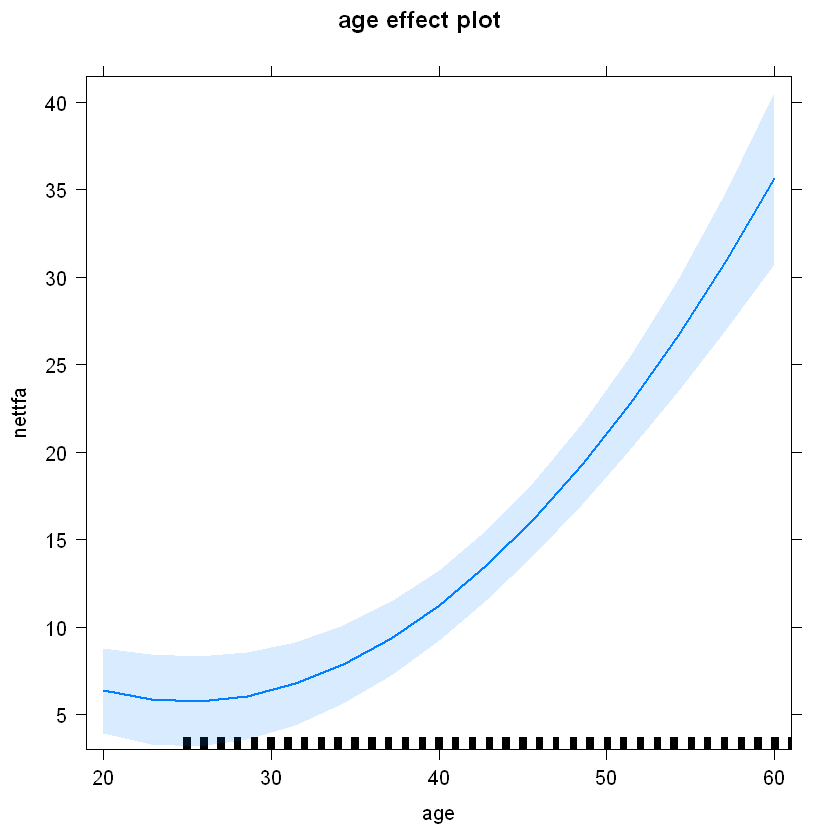

In [48]:
library(effects) #采用effects 包来绘制图像 
plot(effect("age",fit3)) 

In [49]:
fit4<-lm(nettfa~inc+I(inc^2)+I((age-25)^2),data = a) #在（5）的模型上增加inc2 
summary(fit4) #查看拟合结果。inc2的系数的t 值为-0.273，不显著。 
round(fit4$coefficients,6) 


Call:
lm(formula = nettfa ~ inc + I(inc^2) + I((age - 25)^2), data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-179.46  -13.66   -3.00    5.76 1116.08 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.930e+01  3.688e+00  -5.234 1.83e-07 ***
inc              8.722e-01  1.877e-01   4.648 3.57e-06 ***
I(inc^2)        -5.405e-04  1.978e-03  -0.273    0.785    
I((age - 25)^2)  2.440e-02  2.541e-03   9.603  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.6 on 2013 degrees of freedom
Multiple R-squared:  0.1229,	Adjusted R-squared:  0.1216 
F-statistic: 94.01 on 3 and 2013 DF,  p-value: < 2.2e-16


(Intercept)             inc        I(inc^2) I((age - 25)^2) 
     -19.301264        0.872195       -0.000541        0.024403

## C6.13【单侧显著性检验；获取指定残差的观测；以标准差为单位衡量经济显著性】

利用MEAP00_01 中的数据回答本题。 

（1）使用OLS 估计模型 $$math4=\beta_0+\beta_1 lexpp+\beta_2 lenroll+\beta_3 lunch+\mu$$
并用通常的格式报告你的结论。 在 5%的显著性水平上，每个解释变量都是统计显著的吗？ 

（2）求出第（1）部分中回归的拟合值。拟合值的取值范围是多少？它与math4 的实际数据 取值范围相比如何？ （3）求出第（1）部分中回归的残差。哪类学校具有最大的（正）残差？对这个残差给与解 释。 

（4）在方程中增加所有解释变量的平方项，检验他们的联合显著性。你会把他们放到模型中 吗？ 

（5）回到第（1）部分中的模型，将因变量和每个解释变量都除以各自的样本标准差，并重新 进行回归。（除非你还将每个变量分别减去了各自的均值，否则还应该包括一个截距项。）以 标准差为单位，哪个解释变量对数学考试通过率具有最大的影响

In [50]:
attach(meap00_01) 

In [51]:
fit1<-lm(math4~lexppp+lenroll+lunch) #拟合上述模型 
summary(fit1) 


Call:
lm(formula = math4 ~ lexppp + lenroll + lunch)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.326  -8.758   0.914   9.164  51.416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.93246   19.96170   4.605 4.42e-06 ***
lexppp       3.52474    2.09785   1.680   0.0931 .  
lenroll     -5.39915    0.94041  -5.741 1.11e-08 ***
lunch       -0.44874    0.01464 -30.648  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.3 on 1688 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3718 
F-statistic: 334.6 on 3 and 1688 DF,  p-value: < 2.2e-16


In [52]:
a<-fitted(fit1) #令a 为所有拟合值 
range(a) #求 a 的值域，结果为(42.41416，92.670980) 
range(math4)

[1] 42.41416 92.67098

[1]   0 100

In [53]:
max(residuals(fit1)) #求残差的最大值，结果为51.41637。 
b<-residuals(fit1) #将fit1 的残差保存在b 中 
b<-as.data.frame(b) #将 b 转换成数据框格式 
meap00_01<-cbind(meap00_01,b) #由于b 是按样本顺序排列的，这一点可以直接用 residuals(fit1)看到，所以直接将b 列和meap00_01 合并成新的数据框 
c<-subset(meap00_01,b==max(residuals(fit1))) 
c

[1] 51.41637

,dcode,bcode,math4,read4,lunch,enroll,exppp,lenroll,lexppp,b
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1176,73010,1141,97.7,63.6,100,312,5309.859,5.743003,8.57732,51.41637


In [54]:
fit2<-lm(math4~lexppp+lenroll+lunch+ I(lexppp^2)+I(lenroll^2)+I(lunch^2)) #拟合上述模型 
myH0 <- c("I(lexppp^2)"," I(lenroll^2)"," I(lunch^2)") #用联合检验所涉及的变量组成向量，构成 H0。 
linearHypothesis(fit2,myH0) 

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1688,395268.5,NA,NA,NA,NA
1685,394904.3,3,364.214,0.5180163,0.6699116


In [55]:
e<- math4/sd(math4) #将 math4 除以其标准差，保存在e 中 
f<- lexppp /sd(lexppp) #将lexppp 除以其标准差，保存在f 中 
g<- lenroll /sd(lenroll) #将lenroll 除以其标准差，保存在g 中 
h<- lunch /sd(lunch) #将lunch 除以其标准差，保存在h 中 
fit3<-lm(e~f+g+h) #拟合上述模型 
coefficients(fit3)
summary(fit3)

(Intercept)           f           g           h 
 4.76175804  0.03474265 -0.11461992 -0.61285295


Call:
lm(formula = e ~ f + g + h)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.91746 -0.45362  0.04736  0.47466  2.66318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.76176    1.03394   4.605 4.42e-06 ***
f            0.03474    0.02068   1.680   0.0931 .  
g           -0.11462    0.01996  -5.741 1.11e-08 ***
h           -0.61285    0.02000 -30.648  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7926 on 1688 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3718 
F-statistic: 334.6 on 3 and 1688 DF,  p-value: < 2.2e-16
